# Module 5


### Modern Portfolio Theory
In this module, We’ll be looking at investment portfolio optimization with python, the fundamental
concept of diversification and the creation of an efficient frontier that can be used by investors to
choose specific mixes of assets based on investment goals; that is, the trade off between their
desired level of portfolio return vs their desired level of portfolio risk.
Modern Portfolio Theory (https://www.investopedia.com/terms/m/modernportfoliotheory.asp)
suggests that it is possible to construct an "efficient frontier" of optimal portfolios, offering the
maximum possible expected return for a given level of risk. It suggests that it is not enough to
look at the expected risk and return of one particular stock. By investing in more than one stock,
an investor can reap the benefits of diversification, particularly a reduction in the riskiness of the
portfolio. MPT quantifies the benefits of diversification, also known as not putting all of your
eggs in one basket.

# Query 5.1 
For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. ( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


itc_stock_data = pd.read_csv('itc_stock_data.csv')
itc_stock_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,06-Jul-2017,331.05,334.30,338.75,331.30,337.10,337.10,336.17,13429462,4.514575e+09,122886,8156576,60.74
1,ITC,EQ,07-Jul-2017,337.10,338.00,338.20,333.05,334.50,334.30,334.92,9919790,3.322371e+09,91378,6752966,68.08
2,ITC,EQ,10-Jul-2017,334.30,341.00,367.70,331.00,333.00,333.30,333.45,1427399,4.759600e+08,11885,679722,47.62
3,ITC,EQ,11-Jul-2017,333.30,335.00,335.05,330.00,330.20,330.40,331.28,8336685,2.761738e+09,85756,6032829,72.36
4,ITC,EQ,12-Jul-2017,330.40,328.40,333.60,327.40,329.80,328.85,329.19,10249263,3.373964e+09,90432,7048111,68.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,ITC,EQ,01-Jul-2019,273.85,274.40,276.25,274.15,275.20,274.95,275.18,5042447,1.387580e+09,59587,2733563,54.21
491,ITC,EQ,02-Jul-2019,274.95,275.35,275.65,273.20,273.55,273.85,273.97,9976439,2.733288e+09,91998,7785650,78.04
492,ITC,EQ,03-Jul-2019,273.85,274.30,277.55,272.15,277.20,276.70,273.97,18120809,4.964575e+09,96803,13196093,72.82
493,ITC,EQ,04-Jul-2019,276.70,277.45,278.25,275.20,277.80,277.65,276.63,9697597,2.682609e+09,98989,6642736,68.50


In [2]:
import numpy as np
itc_stock_data['Daily Return'] = (itc_stock_data['Close Price']).pct_change() 
itc_stock_data['Daily Return'] = itc_stock_data['Daily Return'].replace([np.inf, -np.inf], np.nan)
itc_stock_data = itc_stock_data.dropna()
print("Mean Daily Return")
itc_stock_data['Daily Return'].mean()

Mean Daily Return


-0.0002877035862325215

In [3]:
itc_stock_data['Daily Standard Deviation'] = (itc_stock_data['Close Price']).pct_change() 
itc_stock_data['Daily Standard Deviation'] = itc_stock_data['Daily Standard Deviation'].replace([np.inf, -np.inf], np.nan)
itc_stock_data = itc_stock_data.dropna()
print("Daily Standard Deviation")
itc_stock_data['Daily Standard Deviation'].std()

Daily Standard Deviation


/home/skystone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/skystone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.01348201288694839

In [4]:
annual_mean =  -0.0002877035862325215 * 252
print("Annual Mean: "+ str(annual_mean))

Annual Mean: -0.07250130373059542


In [5]:
import math
annual_stdev = 0.01348201288694839 * math.sqrt(252)
print("Annual Standard Deviation: "+ str(annual_stdev))

Annual Standard Deviation: 0.21402031962860046


# Query 5.2 
Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [6]:
fortis_data = pd.read_csv('fortis_stock_data.csv', sep='\s*,\s*',header=0, encoding='ascii', engine='python')
fortis_data

,Date,Symbol,Series,Open Price,High Price,Low Price,Last Traded Price,Close Price,Total Traded Quantity,Turnover (in Lakhs)
0,12-Jul-19,FORTIS,EQ,128.40,129.15,127.70,128.60,128.90,200037,257.62
1,11-Jul-19,FORTIS,EQ,129.20,129.35,128.00,128.80,128.35,473229,607.70
2,10-Jul-19,FORTIS,EQ,129.35,130.15,127.20,129.00,128.70,562637,722.68
3,09-Jul-19,FORTIS,EQ,130.50,131.10,129.25,129.65,129.80,296994,386.33
4,08-Jul-19,FORTIS,EQ,132.10,132.65,129.75,130.45,130.55,921556,1200.90
5,05-Jul-19,FORTIS,EQ,133.15,133.60,132.00,132.60,132.70,611323,809.27
6,04-Jul-19,FORTIS,EQ,133.20,134.60,133.05,133.80,133.80,257284,344.08
7,03-Jul-19,FORTIS,EQ,132.70,133.70,130.60,133.15,133.45,359871,477.60
8,02-Jul-19,FORTIS,EQ,133.70,134.20,132.55,133.00,132.85,346087,460.79
9,01-Jul-19,FORTIS,EQ,130.15,133.50,130.00,133.05,132.85,684086,904.57


In [7]:
ongc_data = pd.read_csv('ongc_stock_data.csv', sep='\s*,\s*',header=0, encoding='ascii', engine='python')
ongc_data

,Date,Symbol,Series,Open Price,High Price,Low Price,Last Traded Price,Close Price,Total Traded Quantity,Turnover (in Lakhs)
0,12-Jul-19,ONGC,EQ,153.00,153.35,148.00,148.90,149.70,13015538,19603.69
1,11-Jul-19,ONGC,EQ,153.00,154.10,152.00,153.00,153.10,6576542,10069.94
2,10-Jul-19,ONGC,EQ,153.05,154.40,149.65,151.70,151.65,5310646,8067.62
3,09-Jul-19,ONGC,EQ,152.40,155.45,150.65,153.00,153.40,15033604,23020.49
4,08-Jul-19,ONGC,EQ,161.45,161.50,151.05,152.50,152.40,10273814,15844.92
5,05-Jul-19,ONGC,EQ,167.10,168.05,160.00,160.40,161.50,14509056,23536.81
6,04-Jul-19,ONGC,EQ,166.40,168.90,166.10,167.10,167.10,8827834,14771.33
7,03-Jul-19,ONGC,EQ,165.80,167.95,163.50,166.50,166.30,8253849,13703.79
8,02-Jul-19,ONGC,EQ,163.00,166.25,161.50,165.80,165.65,10975678,18007.89
9,01-Jul-19,ONGC,EQ,168.20,170.40,159.25,161.25,161.00,15160240,24735.22


In [8]:
wipro_data = pd.read_csv('wipro_stock_data.csv')
wipro_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,WIPRO,EQ,06-Jul-2017,257.80,257.80,260.05,255.85,256.50,257.75,258.02,1649570,4.256266e+08,16693,965007,58.50
1,WIPRO,EQ,07-Jul-2017,257.75,255.10,258.25,255.00,257.10,257.70,257.36,1458678,3.754085e+08,19295,957019,65.61
2,WIPRO,EQ,10-Jul-2017,257.70,260.00,268.95,257.00,268.50,268.25,266.40,667432,1.778045e+08,6517,408579,61.22
3,WIPRO,EQ,11-Jul-2017,268.25,266.20,273.50,262.10,264.00,263.20,267.63,4060405,1.086678e+09,53473,2387366,58.80
4,WIPRO,EQ,12-Jul-2017,263.20,263.70,265.80,261.30,263.40,263.80,263.40,1189091,3.132094e+08,38856,647523,54.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,WIPRO,EQ,01-Jul-2019,280.50,281.60,283.40,280.95,282.15,282.00,282.14,1735921,4.897758e+08,33665,955355,55.03
491,WIPRO,EQ,02-Jul-2019,282.00,282.45,285.00,281.70,284.30,284.25,283.86,2609369,7.407040e+08,38881,1219656,46.74
492,WIPRO,EQ,03-Jul-2019,284.25,284.90,285.60,282.05,282.65,282.85,283.25,1258276,3.564106e+08,21561,505062,40.14
493,WIPRO,EQ,04-Jul-2019,282.85,283.00,284.90,282.00,283.60,283.85,283.77,1628331,4.620724e+08,24896,961449,59.05


In [9]:
itc_data = pd.read_csv('itc_stock_data.csv')
itc_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,06-Jul-2017,331.05,334.30,338.75,331.30,337.10,337.10,336.17,13429462,4.514575e+09,122886,8156576,60.74
1,ITC,EQ,07-Jul-2017,337.10,338.00,338.20,333.05,334.50,334.30,334.92,9919790,3.322371e+09,91378,6752966,68.08
2,ITC,EQ,10-Jul-2017,334.30,341.00,367.70,331.00,333.00,333.30,333.45,1427399,4.759600e+08,11885,679722,47.62
3,ITC,EQ,11-Jul-2017,333.30,335.00,335.05,330.00,330.20,330.40,331.28,8336685,2.761738e+09,85756,6032829,72.36
4,ITC,EQ,12-Jul-2017,330.40,328.40,333.60,327.40,329.80,328.85,329.19,10249263,3.373964e+09,90432,7048111,68.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,ITC,EQ,01-Jul-2019,273.85,274.40,276.25,274.15,275.20,274.95,275.18,5042447,1.387580e+09,59587,2733563,54.21
491,ITC,EQ,02-Jul-2019,274.95,275.35,275.65,273.20,273.55,273.85,273.97,9976439,2.733288e+09,91998,7785650,78.04
492,ITC,EQ,03-Jul-2019,273.85,274.30,277.55,272.15,277.20,276.70,273.97,18120809,4.964575e+09,96803,13196093,72.82
493,ITC,EQ,04-Jul-2019,276.70,277.45,278.25,275.20,277.80,277.65,276.63,9697597,2.682609e+09,98989,6642736,68.50


In [10]:
airtel_data = pd.read_csv('airtel_stock_data.csv')
airtel_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BHARTIARTL,EQ,06-Jul-2017,376.30,376.55,382.85,373.95,381.20,381.30,379.89,2162556,8.215367e+08,28573,1129739,52.24
1,BHARTIARTL,EQ,07-Jul-2017,381.30,384.00,387.55,383.00,387.55,385.90,385.28,4371065,1.684069e+09,37883,3261760,74.62
2,BHARTIARTL,EQ,10-Jul-2017,385.90,388.10,410.15,388.00,405.00,405.70,404.08,1901518,7.683562e+08,14555,881739,46.37
3,BHARTIARTL,EQ,11-Jul-2017,405.70,404.15,408.90,393.45,394.45,395.45,401.71,5565524,2.235742e+09,68716,3113596,55.94
4,BHARTIARTL,EQ,12-Jul-2017,395.45,397.80,402.30,394.45,399.00,397.10,397.28,2608465,1.036278e+09,39662,1147573,43.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,BHARTIARTL,EQ,01-Jul-2019,346.65,347.00,349.85,345.15,348.45,348.50,347.66,3405198,1.183867e+09,74444,1664891,48.89
494,BHARTIARTL,EQ,02-Jul-2019,348.50,349.00,354.50,347.35,352.70,353.60,351.74,3745884,1.317578e+09,50799,1460631,38.99
495,BHARTIARTL,EQ,03-Jul-2019,353.60,352.90,356.50,349.75,352.90,353.20,354.15,8317090,2.945468e+09,50960,5653437,67.97
496,BHARTIARTL,EQ,04-Jul-2019,353.20,353.35,365.00,353.00,362.10,362.75,361.71,8407402,3.041005e+09,86438,3971490,47.24


In [11]:
data = pd.DataFrame(airtel_data['Date'])
data['Fortis'] = pd.DataFrame(fortis_data['Close Price'])
data['Ongc'] = pd.DataFrame(ongc_data['Close Price'])
data['Wipro'] = pd.DataFrame(wipro_data['Close Price'])
data['Itc'] = pd.DataFrame(itc_data['Close Price'])
data['Airtel'] = pd.DataFrame(airtel_data['Close Price'])
print("Closing Prices of the 5 respective stocks")
data = data.drop(['Date'], axis = 1) 
data.dropna()

Closing Prices of the 5 respective stocks


,Fortis,Ongc,Wipro,Itc,Airtel
0,128.90,149.70,257.75,337.10,381.30
1,128.35,153.10,257.70,334.30,385.90
2,128.70,151.65,268.25,333.30,405.70
3,129.80,153.40,263.20,330.40,395.45
4,130.55,152.40,263.80,328.85,397.10
5,132.70,161.50,264.05,338.75,403.15
6,133.80,167.10,259.85,337.15,407.00
7,133.45,166.30,266.85,325.15,408.45
8,132.85,165.65,269.00,284.55,408.30
9,132.85,161.00,271.10,291.45,421.25


# Query 5.3 
Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

In [12]:
import numpy as np
returns = data.pct_change()
mean_daily_returns = returns.mean()
mean_daily_returns = mean_daily_returns.values.reshape(5,1)
cov_matrix = returns.cov()
weights = np.asarray([0.2,0.2,0.2,0.2,0.2]) #weights of repective stocks
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)
print('Portfolio expected annualised return is {} and volatility is {}'.format(portfolio_return,portfolio_std_dev))

Portfolio expected annualised return is 0.11 and volatility is 0.1


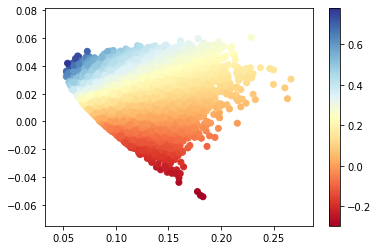

In [13]:
#Monte Carlo Simulation

returns = data.pct_change()
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

num_portfolios = 25000

#set up array to hold results
results = np.zeros((3,num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    

    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]    
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

results_frame
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()

# Query 5.4 
Mark the 2 portfolios where -
Portfolio 1 - The Sharpe ratio is the highest
Portfolio 2 - The volatility is the lowest. 

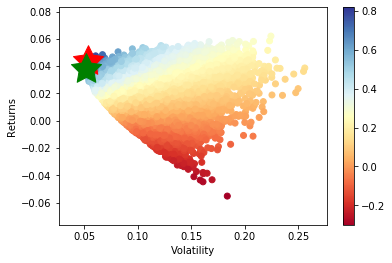

In [14]:
stocks = ['Fortis','Ongc','Wipro','Itc','Airtel']

returns = data.pct_change()
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

num_portfolios = 25000

#array for results
#increased the size of the array for holding the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    

    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]  
     #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)